In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os

In [4]:
directory = '/n/home12/hongwei/HONGWEI/lagranto_era5_0.2um/Simulation_0.2um/2000'
filename = '/traj_20000101.1'

In [5]:
file1 = open(directory+filename, 'r')
Lines = file1.readlines()

N_head = 5 # first 5 lines are head lines, not include data
N_column = 4

Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')

Nt = int( (len(Lines)-4)/N_parcel - 1 ) # 2928
print(Nt)

data = np.zeros((N_parcel, Nt, N_column))

3654


In [6]:
count = 0

# Strips the newline character
for line in tqdm(Lines):
    count += 1
#     print("Line{}: {}".format(count, line.strip()))
    
    if count>=5:
        i = count-5
        i_parcel = math.floor( i / (Nt+1) ) # Nt time lines plue 1 empty line
        i_t = i%(Nt+1)
        
        if i_t!=0:
            a = line.split()

            if i_t==1:
                if float(a[0])!=0.0: print('ERROR: first time is not 0 !!!')
#             data[i_parcel,i_t-1,0] = float(a[0]) # time
            data[i_parcel,i_t-1,1] = float(a[1]) # lon
            data[i_parcel,i_t-1,2] = float(a[2]) # lat
            data[i_parcel,i_t-1,3] = float(a[3]) # lev
#             print(i_parcel, i_t-1, data[i_parcel,i_t-1,:])

100%|██████████| 11052724/11052724 [00:26<00:00, 411787.85it/s]


In [7]:
data2 = np.zeros((Nz,Ny,Nx,Nt,N_column))

for ix in range(Nx):
    for iy in range(Ny):
        for iz in range(Nz):
            i_parcel = ix*(Ny*Nz) + iy*Nz + iz
            data2[iz,iy,ix,:,:] = data[i_parcel,:,:]

In [8]:
data2.shape

(6, 21, 24, 3654, 4)

1: [ 60.  75.  90. 105.] [-6. -3.  0.  3.  6.]
2: [240. 255. 270. 285.] [-6. -3.  0.  3.  6.]


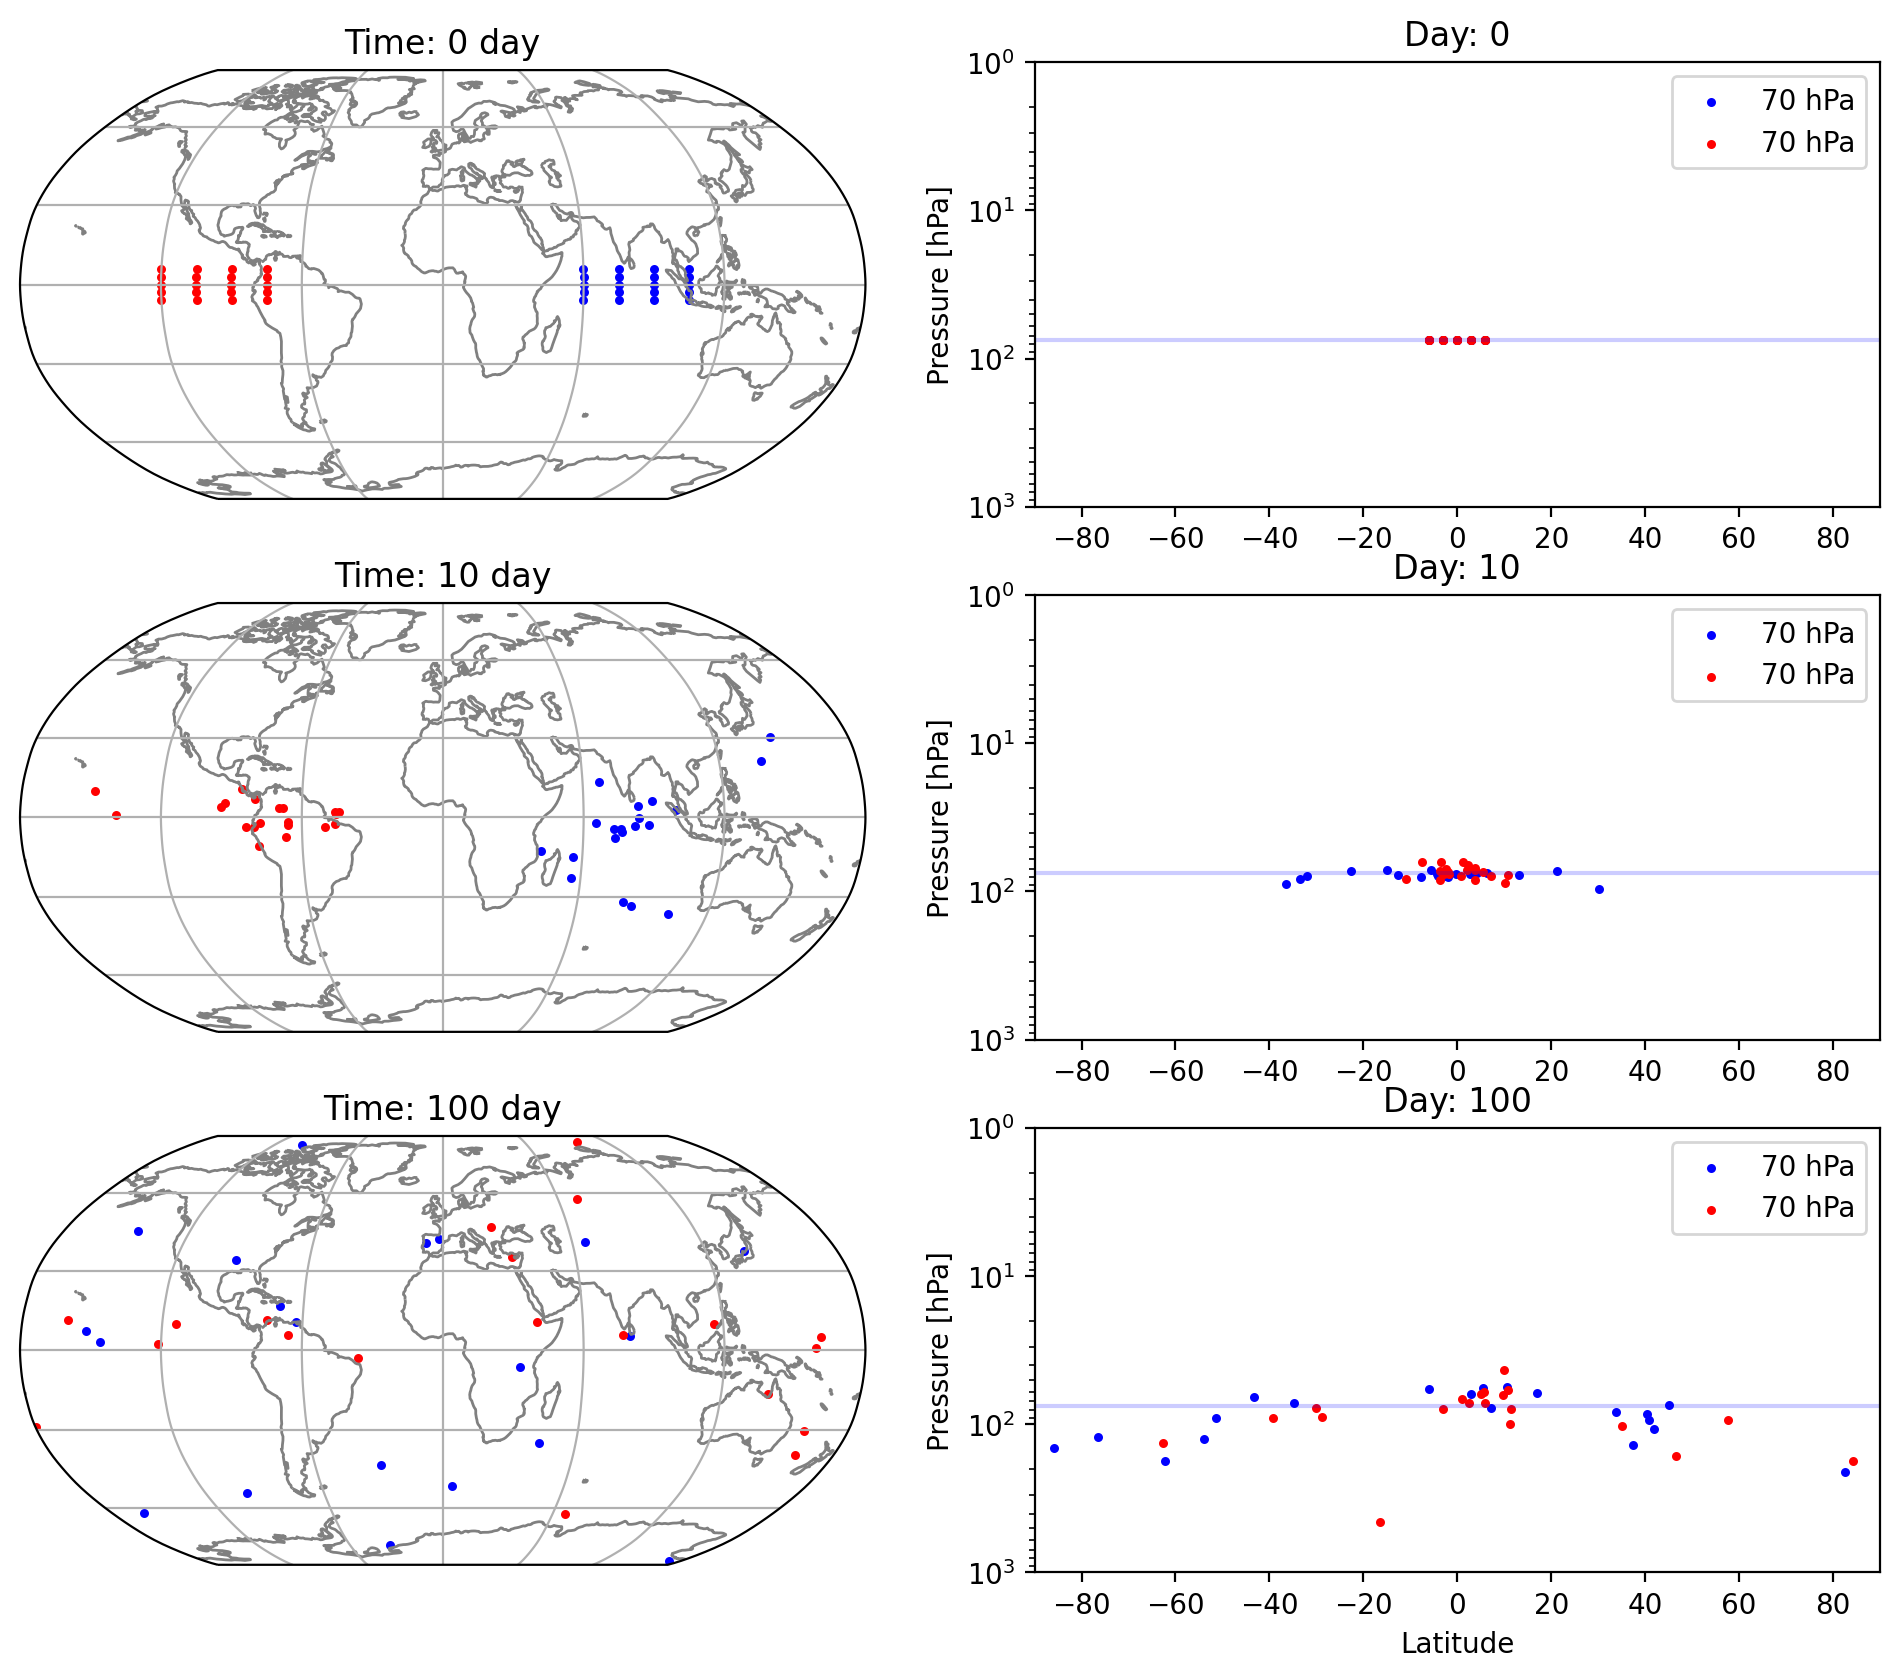

In [9]:
fig = plt.figure(figsize=(12,10), dpi=200)
projection=crs.Robinson(central_longitude=0)

iy1 = 8
iy2 = 13

ix11 = 4
ix12 = 8

ix21 = 16
ix22 = 20

###

i=0
xx1=data2[1,iy1:iy2,ix11:ix12,i,1] # data[::36,i*8,1]
yy1=data2[1,iy1:iy2,ix11:ix12,i,2]
zz1=data2[1,iy1:iy2,ix11:ix12,i,3]


xx2=data2[1,iy1:iy2,ix21:ix22,i,1] # data[::36,i*8,1]
yy2=data2[1,iy1:iy2,ix21:ix22,i,2] 
zz2=data2[1,iy1:iy2,ix21:ix22,i,3] 

# print(xx1.shape, xx2.shape)

ax1 = fig.add_subplot(3,2,1, projection=projection)
ax1.set_global()
ax1.add_feature(cfeature.COASTLINE, edgecolor="grey")
# ax1.add_feature(cfeature.BORDERS, edgecolor="grey")
ax1.gridlines()
    
if i==0: 
    print('1:', xx1[0,:], yy1[:,0])
    print('2:', xx2[0,:], yy2[:,0])
    
ax1.scatter(x=xx1, y=yy1,
            color="blue",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important
    
ax1.scatter(x=xx2, y=yy2,
            color="red",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important

ax1.set_title(f'Time: {i} day');

#

ax11 = fig.add_subplot(3,2,2)
    
ax11.scatter(x=yy1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=5) ## Important

ax11.scatter(x=yy2[:], y=zz2[:],
            color="red", label='70 hPa',
            s=5) ## Important
    
ax11.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
ax11.set_xlim([-90,90])
ax11.set_ylim([1, 1000])
    
ax11.set_yscale('log')
plt.gca().invert_yaxis()
    
# ax11.set_xlabel('Latitude')
ax11.set_ylabel('Pressure [hPa]')
ax11.set_title('Day: ' + str(i))

ax11.legend()
    
    
###
i=10

xx1=data2[1,iy1:iy2,ix11:ix12,i,1] # data[::36,i*8,1]
yy1=data2[1,iy1:iy2,ix11:ix12,i,2]
zz1=data2[1,iy1:iy2,ix11:ix12,i,3]


xx2=data2[1,iy1:iy2,ix21:ix22,i,1] # data[::36,i*8,1]
yy2=data2[1,iy1:iy2,ix21:ix22,i,2] 
zz2=data2[1,iy1:iy2,ix21:ix22,i,3] 


ax2 = fig.add_subplot(3,2,3, projection=projection)
ax2.set_global()
ax2.add_feature(cfeature.COASTLINE, edgecolor="grey")
# ax2.add_feature(cfeature.BORDERS, edgecolor="grey")
ax2.gridlines() 
    
if i==0: 
    print('1:', xx1[0,:], yy1[:,0])
    print('2:', xx2[0,:], yy2[:,0])
    
ax2.scatter(x=xx1, y=yy1,
            color="blue",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important
    
ax2.scatter(x=xx2, y=yy2,
            color="red",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important

ax2.set_title(f'Time: {i} day');

#
ax22 = fig.add_subplot(3,2,4)
    
ax22.scatter(x=yy1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=5) ## Important

ax22.scatter(x=yy2[:], y=zz2[:],
            color="red", label='70 hPa',
            s=5) ## Important
    
ax22.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
ax22.set_xlim([-90,90])
ax22.set_ylim([1, 1000])
    
ax22.set_yscale('log')
plt.gca().invert_yaxis()
    
# ax22.set_xlabel('Latitude')
ax22.set_ylabel('Pressure [hPa]')
ax22.set_title('Day: ' + str(i))

ax22.legend()


###
i=100
xx1=data2[1,iy1:iy2,ix11:ix12,i,1] # data[::36,i*8,1]
yy1=data2[1,iy1:iy2,ix11:ix12,i,2]
zz1=data2[1,iy1:iy2,ix11:ix12,i,3]


xx2=data2[1,iy1:iy2,ix21:ix22,i,1] # data[::36,i*8,1]
yy2=data2[1,iy1:iy2,ix21:ix22,i,2] 
zz2=data2[1,iy1:iy2,ix21:ix22,i,3] 




ax3 = fig.add_subplot(3,2,5, projection=projection)
ax3.set_global()
ax3.add_feature(cfeature.COASTLINE, edgecolor="grey")
# ax3.add_feature(cfeature.BORDERS, edgecolor="grey")
ax3.gridlines()
    
if i==0: 
    print('1:', xx1[0,:], yy1[:,0])
    print('2:', xx2[0,:], yy2[:,0])
    
ax3.scatter(x=xx1, y=yy1,
            color="blue",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important
    
ax3.scatter(x=xx2, y=yy2,
            color="red",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important

ax3.set_title(f'Time: {i} day');

#
ax33 = fig.add_subplot(3,2,6)
    
ax33.scatter(x=yy1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=5) ## Important

ax33.scatter(x=yy2[:], y=zz2[:],
            color="red", label='70 hPa',
            s=5) ## Important
    
ax33.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
ax33.set_xlim([-90,90])
ax33.set_ylim([1, 1000])
    
ax33.set_yscale('log')
plt.gca().invert_yaxis()
    
ax33.set_xlabel('Latitude')
ax33.set_ylabel('Pressure [hPa]')
ax33.set_title('Day: ' + str(i))

ax33.legend();


In [50]:
# plot

for i in tqdm(np.arange(0,30,1)):
    fig = plt.figure(figsize=(12,6), dpi=100)

    ax1 = fig.add_subplot(1,1,1, projection=crs.Robinson(central_longitude=180))
    ax1.set_global()
    ax1.add_feature(cfeature.COASTLINE, edgecolor="grey")
    ax1.add_feature(cfeature.BORDERS, edgecolor="grey")
    ax1.gridlines()


    xx1=data2[0,:,:,i,1] # data[::36,i*8,1]
    yy1=data2[0,:,:,i,2]
    
    xx2=data2[1,:,:,i,1] # data[::36,i*8,1]
    yy2=data2[1,:,:,i,2] 

    xx3=data2[2,:,:,i,1] # data[::36,i*8,1]
    yy3=data2[2,:,:,i,2]
    
    xx4=data2[3,:,:,i,1] # data[::36,i*8,1]
    yy4=data2[3,:,:,i,2] 
    
    xx5=data2[4,:,:,i,1] # data[::36,i*8,1]
    yy5=data2[4,:,:,i,2]
    
    xx6=data2[5,:,:,i,1] # data[::36,i*8,1]
    yy6=data2[5,:,:,i,2] 
    
    
    if i==0: 
        print('1:', xx1[0,:], yy1[:,0])
        print('2:', xx2[0,:], yy2[:,0])
    
#     ax1.scatter(x=xx1, y=yy1,
#             color="black", label='100 hPa (16 km)',
#             s=15,
#             alpha=1.0,
#             transform=crs.PlateCarree()) ## Important
    
#     ax1.scatter(x=xx2, y=yy2,
#             color="magenta", label='75 hPa (18 km)',
#             s=15,
#             alpha=1.0,
#             transform=crs.PlateCarree()) ## Important

#     ax1.scatter(x=xx3, y=yy3,
#             color="blue", label='65 hPa (19 km)',
#             s=15,
#             alpha=1.0,
#             transform=crs.PlateCarree()) ## Important
    
    ax1.scatter(x=xx4, y=yy4,
            color="red", label='55 hPa (20 km)',
            s=15,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important    
    
#     ax1.scatter(x=xx5, y=yy5,
#             color="purple", label='40 hPa (22 km)',
#             s=15,
#             alpha=1.0,
#             transform=crs.PlateCarree()) ## Important
    
#     ax1.scatter(x=xx6, y=yy6,
#             color="orange", label='30 hPa (24 km)',
#             s=15,
#             alpha=1.0,
#             transform=crs.PlateCarree()) ## Important    
    
    ax1.set_title(f'Time: {i} day')

    plt.legend()
    
    plt.tight_layout()
    plt.savefig(str(i+1)+'_xy.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
    
        
plt.close();

  0%|          | 0/30 [00:00<?, ?it/s]

1: [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345.] [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
2: [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345.] [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]


100%|██████████| 30/30 [00:10<00:00,  2.95it/s]


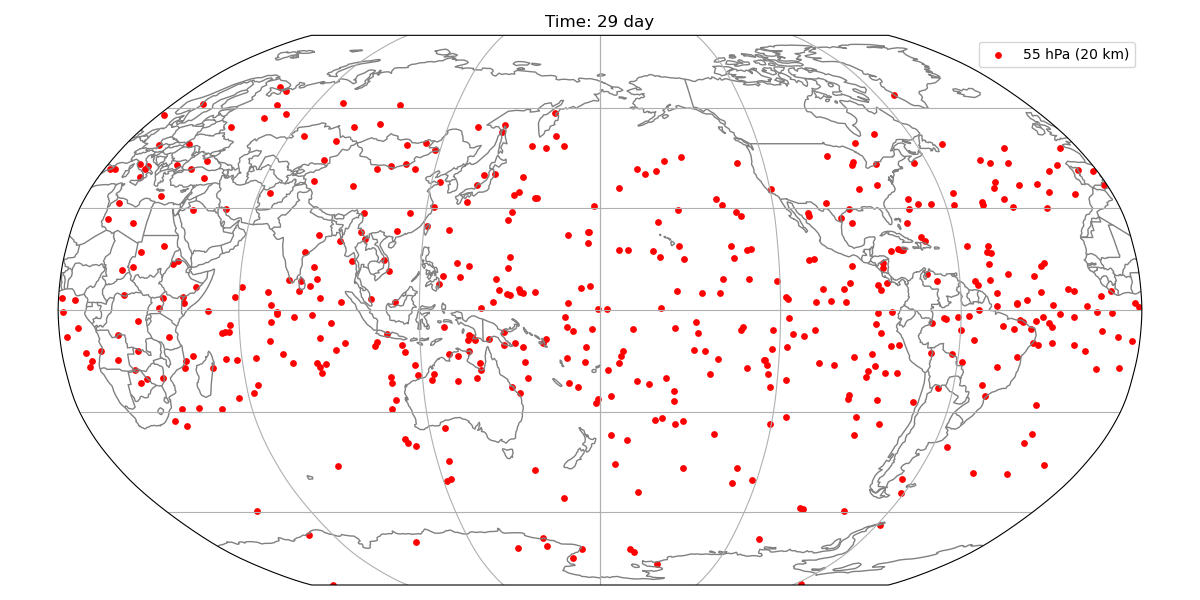

In [59]:
Image(filename=f'30_xy.png')

In [52]:
Pressure = [100, 75, 65, 55, 40, 30] # hPa
Height   = [16,  18, 19, 20, 22, 24] # km

In [68]:

for it in tqdm(range(30)):
    
    fig = plt.figure(figsize=(12,6), dpi=100)

    ax1 = fig.add_subplot(1,1,1)
    
    
    # 100 hPa
    yy1=data2[0,:,:,it,2] # data[::36,i*8,1]
    zz1=data2[0,:,:,it,3]
    
    yy2=data2[1,:,:,it,2] # data[::36,i*8,1]
    zz2=data2[1,:,:,it,3] 

    yy3=data2[2,:,:,it,2] # data[::36,i*8,1]
    zz3=data2[2,:,:,it,3]
    
    yy4=data2[3,:,:,it,2] # data[::36,i*8,1]
    zz4=data2[3,:,:,it,3] 
    
    yy5=data2[4,:,:,it,2] # data[::36,i*8,1]
    zz5=data2[4,:,:,it,3]
    
    yy6=data2[5,:,:,it,2] # data[::36,i*8,1]
    zz6=data2[5,:,:,it,3] 
    
    ax1.scatter(x=yy6[:], y=zz6[:], alpha=0.7,
            color="orange", label='30 hPa (24 km)',
            s=15) ## Important
    
    ax1.scatter(x=yy5[:], y=zz5[:], alpha=0.7,
            color="purple", label='40 hPa (22 km)',
            s=15) ## Important

    ax1.scatter(x=yy4[:], y=zz4[:], alpha=0.7,
            color="red", label='55 hPa (20 km)',
            s=15) ## Important
 
    ax1.scatter(x=yy3[:], y=zz3[:], alpha=0.7,
            color="blue", label='65 hPa (19 km)',
            s=15) ## Important

    ax1.scatter(x=yy2[:], y=zz2[:], alpha=0.7,
            color="magenta", label='75 hPa (18 km)',
            s=15) ## Important
    
    ax1.scatter(x=yy1[:], y=zz1[:], alpha=0.7,
            color="black", label='100 hPa (16 km)',
            s=15) ## Important

        
    ax1.plot((-90,90),(100,100),'black',alpha=0.3)
    ax1.plot((-90,90),(75,75),'magenta',alpha=0.3)
    ax1.plot((-90,90),(65,65),'blue',alpha=0.3)
    ax1.plot((-90,90),(55,55),'red',alpha=0.3)
    ax1.plot((-90,90),(40,40),'purple',alpha=0.3)
    ax1.plot((-90,90),(30,30),'orange',alpha=0.3)

    
    
        
    ax1.set_xlim([-90,90])
    ax1.set_ylim([10, 500])
    
    ax1.set_yscale('log')
    plt.gca().invert_yaxis()
    
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel('Pressure [hPa]')
    ax1.set_title('Day: ' + str(it))

    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(str(it+1)+'_yz.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
    
        
plt.close();

100%|██████████| 30/30 [00:19<00:00,  1.54it/s]


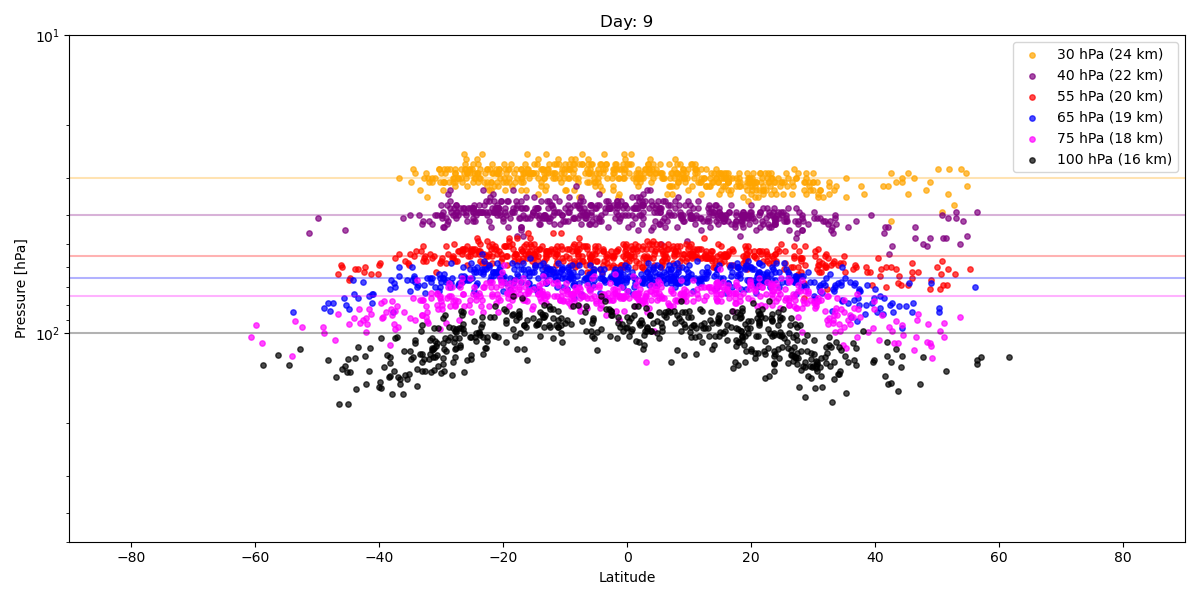

In [70]:
Image(filename=f'10_yz.png')

  0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'Bin_bdy' is not defined

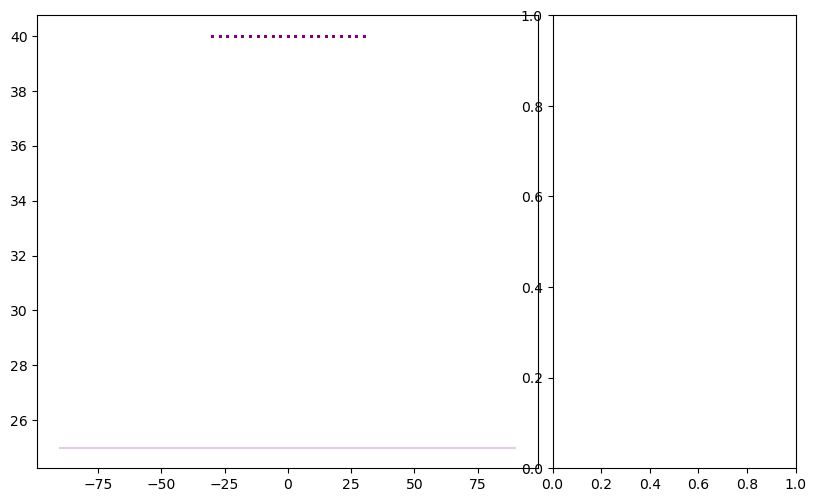

In [25]:
N_days = 200

for i in tqdm(range( int(365*3/N_days) )):
    
    
    # (1)
    fig = plt.figure(figsize=(12,6), dpi=100)
    gs = gridspec.GridSpec(1, 11, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0:6])
    ax2 = fig.add_subplot(gs[0, 6:9])

    
    
    # 25 hpa    
    xx4=data2[4,:,:,i*8*N_days,2].flatten()
    zz4=data2[4,:,:,i*8*N_days,3].flatten()
    
    ax1.scatter(x=xx4[:], y=zz4[:],
            color="purple", label='25 hPa',
            s=1) ## Important
    
    ax1.plot((-90,90),(25,25),'purple',alpha=0.2)
    
    
    Bin_num, Bin_bdy = np.histogram(zz4, bins=Bin_bdy)
    ax2.plot(Bin_num/np.sum(Bin_num)*100, Bin_mid, 'purple', label='25 hPa')

    

    # 40 hpa
    xx3=data2[3,:,:,i*8*N_days,2].flatten()
    zz3=data2[3,:,:,i*8*N_days,3].flatten()
    
    ax1.scatter(x=xx3[:], y=zz3[:],
            color="cyan", label='40 hPa',
            s=1) ## Important
    
    ax1.plot((-90,90),(40,40),'cyan',alpha=0.2)
    
    Bin_num, Bin_bdy = np.histogram(zz3, bins=Bin_bdy)
    ax2.plot(Bin_num/np.sum(Bin_num)*100, Bin_mid, 'cyan', label='40 hPa')
    
    
    
    # 50 hpa
    xx2=data2[2,:,:,i*8*N_days,2].flatten()
    zz2=data2[2,:,:,i*8*N_days,3].flatten()
    
    ax1.scatter(x=xx2[:], y=zz2[:],
            color="orange", label='50 hPa',
            s=1) ## Important
    
    ax1.plot((-90,90),(50,50),'orange',alpha=0.2)

        
    Bin_num, Bin_bdy = np.histogram(zz2, bins=Bin_bdy)
    ax2.plot(Bin_num/np.sum(Bin_num)*100, Bin_mid, 'orange', label='50 hPa')
    
    
    
    # 70 hpa    
    xx1=data2[1,:,:,i*8*N_days,2].flatten()
    zz1=data2[1,:,:,i*8*N_days,3].flatten()
    
    ax1.scatter(x=xx1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=1) ## Important

    ax1.plot((-90,90),(70,70),'blue',alpha=0.2)
    
    
    Bin_num, Bin_bdy = np.histogram(zz1, bins=Bin_bdy)
    ax2.plot(Bin_num/np.sum(Bin_num)*100, Bin_mid, 'blue', label='70 hPa')
    
        

    # 100 hpa
    xx0=data2[0,:,:,i*8*N_days,2].flatten()
    zz0=data2[0,:,:,i*8*N_days,3].flatten()
    
    ax1.scatter(x=xx0[:], y=zz0[:],
            color="red", label='100 hPa',
            s=1) ## Important
    ax1.plot((-90,90),(100,100),'red',alpha=0.2)
        
    
#     Bin_num, Bin_bdy = np.histogram(zz0, bins=Bin_bdy)
#     ax2.plot(Bin_num/np.sum(Bin_num)*100, Bin_mid, 'red', label='100 hPa')
    
    
    
    ax1.set_xlim([-90,90])
    ax1.set_ylim([1, 1000])
    
    ax1.set_yscale('log')
#     plt.gca().invert_yaxis()
    ax1.invert_yaxis()
    
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel('Pressure [hPa]')
    ax1.set_title('Day: ' + str(i*N_days))
    ax1.legend()

    
    #
#     ax2.set_ylim([1, 1000])
#     ax2.set_yscale('log')
#     ax2.set_ylabel('Pressure [hPa]')
#     ax2.invert_yaxis()
#     ax2.set_xlim([0, 50])
#     ax2.set_xlabel('Particle number percentage [%]')
#     ax2.legend()

    
    #
    
    
    
    plt.tight_layout()
    plt.savefig(str(i+1)+'_yz.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
    
        
plt.close();